## 1.1 Loading of Libraries
### Load all the libraries to be used



In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectPercentile,chi2,f_classif
from sklearn.metrics import confusion_matrix , classification_report

from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings(action="ignore")

In [117]:
# Column Descriptions:
# date: The date when the match took place.
# time: The time the match started.
# comp: The competition or tournament name (e.g., League, Cup, Champions League).
# round: The stage or round of the competition (e.g., Round of 16, Semifinal, Matchday 1).
# day: The day of the week the match occurred (e.g., Sunday, Monday).
# venue: The location or stadium where the match was held.
# result: The match outcome (e.g., Win, Draw, Loss).
# gf: Goals For - the number of goals scored by the team.
# ga: Goals Against - the number of goals conceded by the team.
# opponent: The name of the opposing team.
# xg: Expected Goals - the predicted number of goals based on the quality of chances.
# xga: Expected Goals Against - the predicted number of goals expected to be conceded.
# poss: Possession percentage of the team.
# attendance: The number of spectators attending the match.
# captain: The name of the team captain for the match.
# formation: The team's tactical formation (e.g., 4-3-3, 3-5-2).
# referee: The name of the match referee.
# match report: A written summary or report of the match events.
# notes: Additional notes about the match (e.g., player sent off, match delay).
# sh: Shots - the total number of shots taken by the team.
# sot: Shots on Target - the number of shots that were on target.
# dist: The average distance from which the team's shots were taken.
# fk: Free Kicks - the number of free kicks awarded to the team.
# pk: Penalty Kicks - the number of penalties scored.
# pkatt: Penalty Kick Attempts - the number of penalties attempted.
# season: The football season (e.g., 2023/2024).
# team: The name of the team for which this data is recorded.


## 1.2 Loading of Datasets
### Let us load the datasets


In [118]:
df = pd.read_csv("matches.csv")
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


## 2 - Exploratory Data Analysis

### Exploration of Data

In [119]:
df.describe()

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,4788.000000,3155.000000,0.0,4788.000000,4788.000000,4786.000000,4788.000000,4788.000000,4788.00000,4788.000000
mean,63.044069,1.447995,1.405388,1.396512,1.364745,50.432957,38397.586688,NaN,12.619256,4.261278,17.356247,0.453216,0.118212,0.14599,2022.365079
std,42.865191,1.312635,1.286927,0.828847,0.814947,12.810958,17595.849137,NaN,5.548444,2.459963,3.049341,0.665250,0.342362,0.37937,1.461850
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,5.300000,0.000000,0.000000,0.00000,2020.000000
25%,28.000000,0.000000,0.000000,0.800000,0.700000,41.000000,25513.500000,NaN,9.000000,2.000000,15.400000,0.000000,0.000000,0.00000,2021.000000
50%,62.000000,1.000000,1.000000,1.300000,1.200000,51.000000,36347.000000,NaN,12.000000,4.000000,17.200000,0.000000,0.000000,0.00000,2023.000000
75%,87.000000,2.000000,2.000000,1.900000,1.800000,60.000000,53235.500000,NaN,16.000000,6.000000,19.100000,1.000000,0.000000,0.00000,2024.000000
max,182.000000,9.000000,9.000000,7.000000,7.000000,82.000000,75546.000000,NaN,36.000000,15.000000,39.900000,4.000000,3.000000,3.00000,2024.000000


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4788 entries, 0 to 4787
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4788 non-null   int64  
 1   date          4788 non-null   object 
 2   time          4788 non-null   object 
 3   comp          4788 non-null   object 
 4   round         4788 non-null   object 
 5   day           4788 non-null   object 
 6   venue         4788 non-null   object 
 7   result        4788 non-null   object 
 8   gf            4788 non-null   int64  
 9   ga            4788 non-null   int64  
 10  opponent      4788 non-null   object 
 11  xg            4788 non-null   float64
 12  xga           4788 non-null   float64
 13  poss          4788 non-null   int64  
 14  attendance    3155 non-null   float64
 15  captain       4788 non-null   object 
 16  formation     4788 non-null   object 
 17  referee       4788 non-null   object 
 18  match report  4788 non-null 

In [121]:
df.isnull().sum()

Unnamed: 0         0
date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 0
xga                0
poss               0
attendance      1633
captain            0
formation          0
referee            0
match report       0
notes           4788
sh                 0
sot                0
dist               2
fk                 0
pk                 0
pkatt              0
season             0
team               0
dtype: int64

In [122]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result',
       'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain',
       'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist',
       'fk', 'pk', 'pkatt', 'season', 'team'],
      dtype='object')

In [123]:
df.shape


(4788, 28)

In [124]:
df.head(5)

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


# Data Preprocessing
### 1-Handling Missing Values
### 2-Data Cleaning ( check outliers and duplicates)
### 3-Feature Engineering
### 4-Encoding Categorical Variables
### 5-Feature Selection


## 1- Handel Massing Values

In [125]:
dff=df.drop(columns=['notes','date','Unnamed: 0'])


In [126]:
# Fill missing values in the 'attendance' column with the average attendance.
dff['attendance'].fillna(dff['attendance'].sum() / len(dff['attendance']), inplace=True)


In [127]:
# Convert the 'attendance' column to integer data type.
dff['attendance'] = dff['attendance'].astype(int)

dff['attendance']

0       25301
1       25301
2       25301
3       25301
4       25301
        ...  
4783    25301
4784    25301
4785    25301
4786    25301
4787    25301
Name: attendance, Length: 4788, dtype: int32

In [128]:
# Drop all rows with missing values from the DataFrame.
dff = dff.dropna()


## 2- Data Cleaning 

### 2.1 Check_duplicates

#### Checking for duplicates is done to identify and handle duplicate rows in the dataset.


In [129]:
dataframe={"Matches":dff}


In [130]:
def check_duplicates(dataframes):
        duplicates = dataframes[dataframes.duplicated()]
        print(f"\nChecking duplicates in  dataset:")
        if duplicates.empty:
            print("No duplicates found.")
        else:
            print(f"Number of duplicate rows: {duplicates.shape[0]}")
            print(duplicates)
        print("*" * 40)


In [131]:
check_duplicates(dff)


Checking duplicates in  dataset:
No duplicates found.
****************************************


In [132]:
dff.drop_duplicates()

,time,comp,round,day,venue,result,gf,ga,opponent,xg,...,referee,match report,sh,sot,dist,fk,pk,pkatt,season,team
0,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,...,Andre Marriner,Match Report,13,8,21.1,2,1,1,2024,Manchester City
1,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,...,Michael Oliver,Match Report,16,5,19.8,1,0,0,2024,Manchester City
2,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,...,Mike Dean,Match Report,23,1,18.2,1,0,0,2024,Manchester City
3,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,...,Chris Kavanagh,Match Report,13,5,17.7,0,0,0,2024,Manchester City
4,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,...,Anthony Taylor,Match Report,14,7,20.9,1,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,...,Anthony Taylor,Match Report,12,3,16.9,1,0,0,2020,Norwich City
4784,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,...,Kevin Friend,Match Report,11,2,19.8,1,0,0,2020,Norwich City
4785,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,...,Jonathan Moss,Match Report,2,0,20.6,0,0,0,2020,Norwich City
4786,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,...,Kevin Friend,Match Report,6,2,13.4,0,0,0,2020,Norwich City


### 2.2 Outlier Function with (I Q R _ stander deviation)

In [133]:
# This function identifies outliers in a specific column of a DataFrame using the Interquartile Range (IQR) method.

def check_outliers(colm, df):
    # Calculate the first quartile (Q1) and third quartile (Q3) of the column.
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)

    # Compute the Interquartile Range (IQR).
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers.
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify values in the column that fall outside the bounds (outliers).
    outliers = df[(df[colm] < lower_bound) | (df[colm] > upper_bound)][colm].tolist()

    # Return a list of outliers.
    return outliers


In [134]:
# Instead of removing outliers, it clips the outliers to the nearest acceptable values based on the IQR bounds.

def handle_outliers(colm, df):
    # Calculate the first quartile (Q1) and third quartile (Q3) of the column.
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)

    # Compute the Interquartile Range (IQR).
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers.
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Clip the values in the column that are outside the bounds to the nearest valid values.
    df[colm] = df[colm].clip(lower=lower_bound, upper=upper_bound)


In [135]:
# This function processes outliers in all numeric columns of the DataFrame..

def process_outliers(df):
    # Select all numeric columns (columns with data types float64 or int64).
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Iterate through each numeric column.
    for col in numeric_columns:
        # Identify outliers using the check_outliers function.
        outliers = check_outliers(col, df)
        print(f"Outliers in column '{col}': {outliers}")

        # Handle the identified outliers by clipping them to the IQR bounds using handle_outliers function.
        handle_outliers(col, df)
        print(f"Outliers in column '{col}' have been handled.\n")


In [136]:
process_outliers(dff)


Outliers in column 'gf': [6, 9, 7, 6, 7, 8, 6, 9, 6, 6, 6, 6, 6, 8, 6, 6, 6, 9, 7, 6, 6, 6, 7, 6, 6, 7, 6, 6, 9, 7, 6, 7, 8, 6, 9]
Outliers in column 'gf' have been handled.

Outliers in column 'ga': [6, 7, 6, 7, 9, 6, 6, 6, 6, 8, 6, 6, 7, 6, 6, 9, 6, 6, 6, 6, 6, 7, 6, 7, 6, 7, 6, 7, 9, 9, 6, 8]
Outliers in column 'ga' have been handled.

Outliers in column 'xg': [3.6, 4.7, 4.1, 4.0, 3.7, 3.9, 3.9, 5.9, 4.4, 4.2, 3.6, 3.7, 3.6, 4.6, 3.6, 4.6, 3.6, 4.0, 4.2, 3.7, 3.6, 7.0, 3.6, 4.5, 3.6, 3.8, 4.1, 4.2, 4.1, 3.9, 4.1, 4.1, 4.0, 3.7, 4.3, 3.8, 4.4, 5.2, 3.7, 3.7, 4.3, 3.6, 3.9, 4.0, 4.2, 4.4, 3.8, 3.6, 4.6, 3.6, 4.3, 4.3, 3.6, 5.9, 4.2, 4.2, 3.6, 3.6, 3.7, 3.6, 4.7, 4.1, 4.0, 3.7, 3.9, 3.9, 5.9, 4.4, 4.2, 3.6, 3.7, 3.6, 4.6, 3.6, 4.6, 3.7]
Outliers in column 'xg' have been handled.

Outliers in column 'xga': [3.5, 4.1, 3.6, 3.9, 4.7, 3.9, 3.7, 4.0, 3.5, 3.5, 4.1, 4.1, 3.8, 3.5, 7.0, 4.0, 3.6, 3.6, 3.6, 4.1, 4.1, 3.7, 3.5, 3.7, 4.5, 3.6, 4.0, 4.2, 4.2, 3.5, 3.9, 3.9, 3.7, 3.6, 3.7, 4.2, 5.

# 3- Feature Engineering

In [137]:
# Create a new column 'XGD' which represents the difference between expected goals (xg) and expected goals against (xga).
dff['XGD'] = dff['xg'] - dff['xga']


In [138]:
# Create a new column 'Weekend' which indicates whether the match took place on a weekend (Saturday or Sunday).
dff['Weekend'] = dff['day'].apply(lambda x: 1 if x in ['Sat', 'Sun'] else 0)

dff


,time,comp,round,day,venue,result,gf,ga,opponent,xg,...,sh,sot,dist,fk,pk,pkatt,season,team,XGD,Weekend
0,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,...,13.0,8,21.1,2.0,0,0,2024,Manchester City,1.30,0
1,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,...,16.0,5,19.8,1.0,0,0,2024,Manchester City,-2.00,1
2,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,...,23.0,1,18.2,1.0,0,0,2024,Manchester City,-1.20,1
3,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,...,13.0,5,17.7,0.0,0,0,2024,Manchester City,0.40,1
4,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,...,14.0,7,20.9,1.0,0,0,2024,Manchester City,0.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,...,12.0,3,16.9,1.0,0,0,2020,Norwich City,0.00,0
4784,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,...,11.0,2,19.8,1.0,0,0,2020,Norwich City,-2.85,1
4785,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,...,2.0,0,20.6,0.0,0,0,2020,Norwich City,-2.40,0
4786,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,...,6.0,2,13.4,0.0,0,0,2020,Norwich City,-1.50,1


In [139]:
# Create a new column '+/-' which represents the goal difference for each match.

dff['+/-']=dff['gf']-dff['ga']

In [140]:

dff['day'].value_counts()

day
Sat    2055
Sun    1353
Wed     426
Mon     315
Tue     280
Thu     198
Fri     159
Name: count, dtype: int64

In [141]:
dff['opponent'].value_counts()

opponent
Wolves             240
Crystal Palace     240
Everton            240
Aston Villa        240
Newcastle Utd      240
West Ham           240
Arsenal            240
Brighton           238
Tottenham          238
Manchester City    238
Manchester Utd     238
Chelsea            238
Liverpool          238
Burnley            202
Southampton        202
Leicester City     200
Sheffield Utd      164
Leeds United       152
Fulham             152
Bournemouth        126
Brentford          114
Norwich City        88
Watford             88
West Brom           76
Nott'ham Forest     76
Luton Town          38
Name: count, dtype: int64

In [142]:
dff['team'].value_counts()

team
Manchester City             266
Manchester United           266
Liverpool                   266
Chelsea                     266
Tottenham Hotspur           266
Leicester City              228
West Ham United             228
Arsenal                     228
Brighton and Hove Albion    228
Everton                     228
Aston Villa                 228
Newcastle United            228
Wolverhampton Wanderers     228
Crystal Palace              226
Southampton                 190
Burnley                     190
Leeds United                152
Fulham                      152
Sheffield United            152
Bournemouth                 114
Brentford                   114
West Bromwich Albion         76
Nottingham Forest            76
Watford                      76
Norwich City                 76
Luton Town                   38
Name: count, dtype: int64

In [143]:
dff['venue'].value_counts()

venue
Away    2394
Home    2392
Name: count, dtype: int64

# Data Visualization

In [144]:
# Group the DataFrame by 'season' and calculate the total attendance for each season by summing the 'attendance' values.

total_attendaance_for_season=dff.groupby("season")['attendance']
total_attendaance_for_season.sum()

season
2020    27300376
2021    17935379
2022    30052958
2023    39840107
2024    47281497
Name: attendance, dtype: int32

In [145]:
attendance_sum_by_season = df.groupby('season')['attendance'].sum().reset_index()
attendance_sum_by_season

,season,attendance
0,2020,22644992.0
1,2021,351184.0
2,2022,30052958.0
3,2023,38397950.0
4,2024,29697302.0


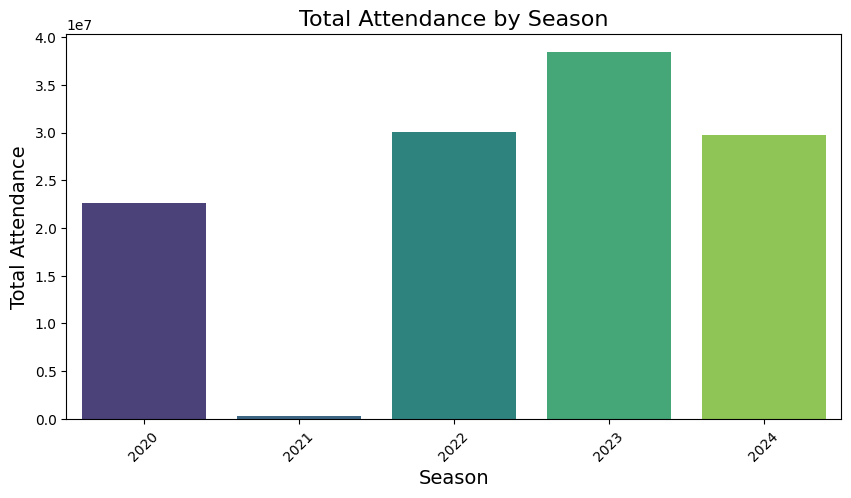

In [146]:
# Set the figure size for the plot
plt.figure(figsize=(10, 5))

# Use a barplot to visualize the total attendance for each season
sns.barplot(x='season', y='attendance', data=attendance_sum_by_season, palette="viridis")

# Add labels and title to the plot
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Attendance', fontsize=14)
plt.title('Total Attendance by Season', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [147]:
# Group the DataFrame by 'team' and calculate the total goals scored by each team.
goals_for_the_home_team=dff.groupby('team')['gf'].sum().reset_index()
goals_for_the_home_team

,team,gf
0,Arsenal,404
1,Aston Villa,325
2,Bournemouth,131
3,Brentford,162
4,Brighton and Hove Albion,287
5,Burnley,184
6,Chelsea,441
7,Crystal Palace,258
8,Everton,255
9,Fulham,164


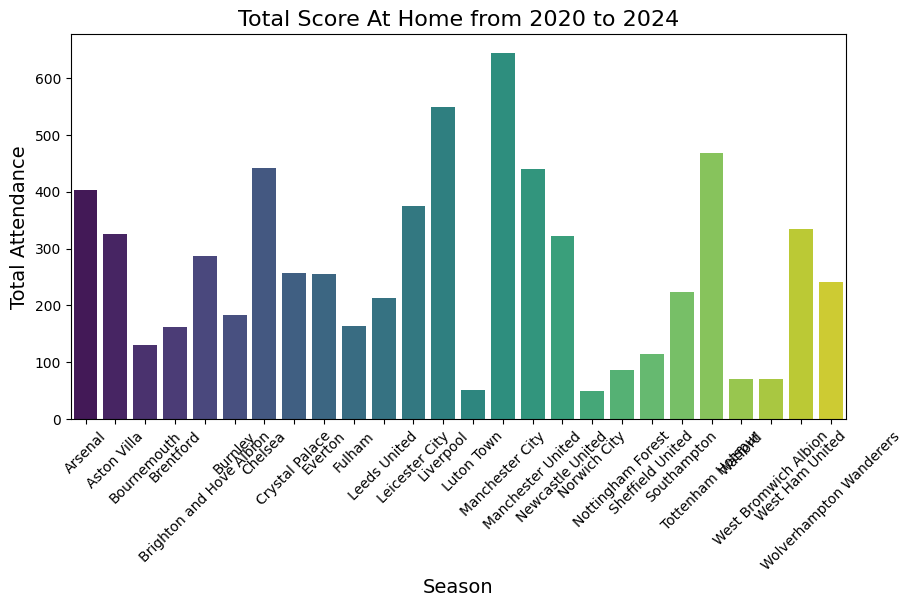

In [148]:
plt.figure(figsize=(10, 5))

# Use barplot to show the sum of attendance by season
sns.barplot(x='team', y='gf', data=goals_for_the_home_team, palette="viridis")

plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Attendance', fontsize=14)
plt.title('Total Score At Home from 2020 to 2024', fontsize=16)

plt.xticks(rotation=45)
plt.show()

In [149]:
# Group the DataFrame by 'team' and calculate the total goals conceded by each team.
goals_for_the_Away_team=dff.groupby('team')['ga'].sum().reset_index()
goals_for_the_Away_team

,team,ga
0,Arsenal,246
1,Aston Villa,319
2,Bournemouth,198
3,Brentford,167
4,Brighton and Hove Albion,304
5,Burnley,291
6,Chelsea,323
7,Crystal Palace,329
8,Everton,325
9,Fulham,220


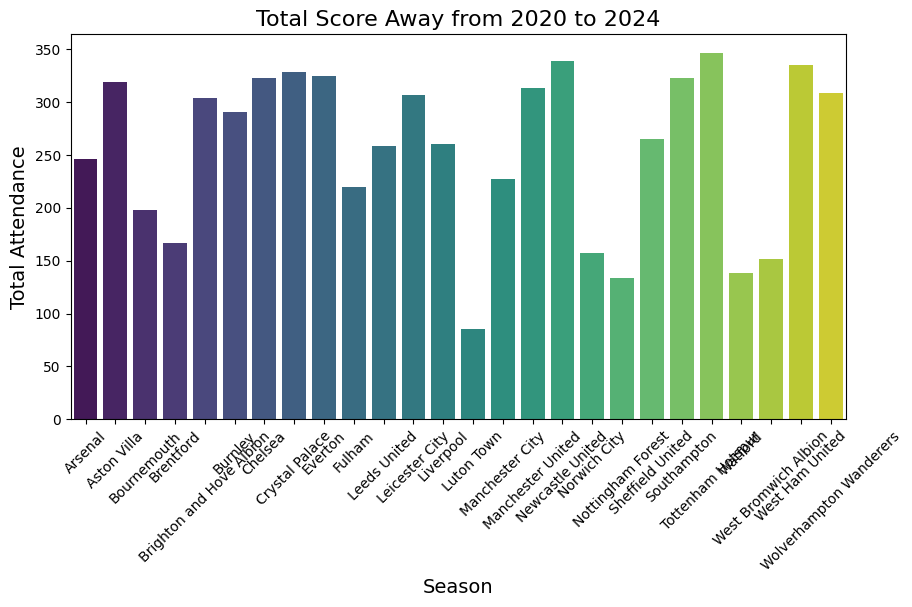

In [150]:
plt.figure(figsize=(10, 5))

# Use barplot to show the sum of attendance by season
sns.barplot(x='team', y='ga', data=goals_for_the_Away_team, palette="viridis")

plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Attendance', fontsize=14)
plt.title('Total Score Away from 2020 to 2024', fontsize=16)

plt.xticks(rotation=45)
plt.show()

In [151]:
# Find the team that conceded the most goals away by filtering the rows with the maximum 'ga' value
max_goals_for_the_Away_team = goals_for_the_Away_team[goals_for_the_Away_team['ga'] == goals_for_the_Away_team['ga'].max()]

# Extract the team name and the maximum goals conceded
team_with_max_goals_away = max_goals_for_the_Away_team['team'].values[0]
max_goals_away = max_goals_for_the_Away_team['ga'].values[0]

# Print the result
print(f"The team that conceded the most goals away is {team_with_max_goals_away} with {max_goals_away} goals.")


The team that conceded the most goals away is Tottenham Hotspur with 347 goals.


In [152]:
# Find the team that scored the most goals at home by filtering the rows with the maximum 'gf' value
max_goals_for_the_home_team = goals_for_the_home_team[goals_for_the_home_team['gf'] == goals_for_the_home_team['gf'].max()]

# Extract the team name and the maximum goals scored at home
team_with_max_goals_home = max_goals_for_the_home_team['team'].values[0]
max_goals_home = max_goals_for_the_home_team['gf'].values[0]

# Print the result
print(f"The team that scored the most goals at home is {team_with_max_goals_home} with {max_goals_home} goals.")


The team that scored the most goals at home is Manchester City with 645 goals.


In [153]:
# Group the DataFrame by 'team' and count the occurrences of each result (e.g., win, draw, loss) for each team.
team_results = df.groupby('team')['result'].value_counts().unstack()
team_results

result,D,L,W
team,,,
Arsenal,42,60,126
Aston Villa,43,93,92
Bournemouth,22,59,33
Brentford,30,46,38
Brighton and Hove Albion,77,82,69
Burnley,50,93,47
Chelsea,63,75,128
Crystal Palace,63,95,70
Everton,53,96,79


In [154]:
# Find the maximum number of wins, losses, and draws for any team
max_wins = team_results['W'].max()
max_losses = team_results['L'].max()
max_draws = team_results['D'].max()

# Extract the teams that have the maximum number of wins, losses, and draws
teams_with_max_wins = team_results[team_results['W'] == max_wins]
teams_with_max_losses = team_results[team_results['L'] == max_losses]
teams_with_max_draws = team_results[team_results['D'] == max_draws]

# Print the results
print(f"Teams with the maximum number of wins ({max_wins}):")
print(teams_with_max_wins)

print(f"\nTeams with the maximum number of losses ({max_losses}):")
print(teams_with_max_losses)

print(f"\nTeams with the maximum number of draws ({max_draws}):")
print(teams_with_max_draws)


Teams with the maximum number of wins (191):
result            D   L    W
team                        
Manchester City  34  41  191

Teams with the maximum number of losses (98):
result             D   L   W
team                        
Sheffield United  23  98  31

Teams with the maximum number of draws (77):
result                     D   L   W
team                                
Brighton and Hove Albion  77  82  69


In [155]:
# Group the DataFrame by 'season' and calculate the total attendance for each season.

attendance_sum_by_season = df.groupby('season')['attendance'].sum().reset_index()
attendance_sum_by_season

,season,attendance
0,2020,22644992.0
1,2021,351184.0
2,2022,30052958.0
3,2023,38397950.0
4,2024,29697302.0


In [156]:
# Use pd.get_dummies to create dummy/indicator variables for the 'venue' column
# This converts the 'venue' column into multiple binary columns, one for each unique value in 'venue'
ddf = pd.get_dummies(dff, columns=['venue'])
ddf


,time,comp,round,day,result,gf,ga,opponent,xg,xga,...,fk,pk,pkatt,season,team,XGD,Weekend,+/-,venue_Away,venue_Home
0,20:15 (21:15),Premier League,Matchweek 2,Mon,W,3,1,Wolves,1.9,0.60,...,2.0,0,0,2024,Manchester City,1.30,0,2,True,False
1,16:30 (17:30),Premier League,Matchweek 3,Sun,L,2,5,Leicester City,0.9,2.90,...,1.0,0,0,2024,Manchester City,-2.00,1,-3,False,True
2,17:30 (18:30),Premier League,Matchweek 4,Sat,D,1,1,Leeds United,1.2,2.40,...,1.0,0,0,2024,Manchester City,-1.20,1,0,True,False
3,17:30 (18:30),Premier League,Matchweek 5,Sat,W,1,0,Arsenal,1.3,0.90,...,0.0,0,0,2024,Manchester City,0.40,1,1,False,True
4,12:30 (13:30),Premier League,Matchweek 6,Sat,D,1,1,West Ham,1.0,0.30,...,1.0,0,0,2024,Manchester City,0.70,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,18:00 (19:00),Premier League,Matchweek 34,Tue,L,1,2,Watford,1.2,1.20,...,1.0,0,0,2020,Norwich City,0.00,0,-1,True,False
4784,12:30 (13:30),Premier League,Matchweek 35,Sat,L,0,4,West Ham,0.6,3.45,...,1.0,0,0,2020,Norwich City,-2.85,1,-4,False,True
4785,20:15 (21:15),Premier League,Matchweek 36,Tue,L,0,1,Chelsea,0.1,2.50,...,0.0,0,0,2020,Norwich City,-2.40,0,-1,True,False
4786,17:30 (18:30),Premier League,Matchweek 37,Sat,L,0,2,Burnley,0.3,1.80,...,0.0,0,0,2020,Norwich City,-1.50,1,-2,False,True


In [157]:
# Create a new DataFrame with columns 'team', 'season', and '+/-'
goals_for_season = ddf[['team', 'season', '+/-']]

# Group the data by 'team' and 'season', and calculate the sum of '+/-' for each group
sum_goals_for_season = goals_for_season.groupby(['team', 'season'], as_index=False).sum()

# Display the result
sum_goals_for_season


,team,season,+/-
0,Arsenal,2020,8
1,Arsenal,2021,16
2,Arsenal,2022,13
3,Arsenal,2023,45
4,Arsenal,2024,76
...,...,...,...
99,Wolverhampton Wanderers,2020,11
100,Wolverhampton Wanderers,2021,-16
101,Wolverhampton Wanderers,2022,-5
102,Wolverhampton Wanderers,2023,-26


In [158]:
# Create a pivot table with 'season' as the index and 'team' as the columns
grouped_pivot = sum_goals_for_season.pivot(index='season', columns='team')
grouped_pivot

+/-                                                             \
team   Arsenal Aston Villa Bournemouth Brentford Brighton and Hove Albion   
season                                                                      
2020       8.0       -25.0       -25.0       NaN                    -15.0   
2021      16.0         7.0         NaN       NaN                     -6.0   
2022      13.0        -2.0         NaN      -8.0                     -2.0   
2023      45.0         5.0       -30.0      12.0                     18.0   
2024      76.0        21.0       -12.0      -9.0                    -12.0   

                                                      ...                   \
team   Burnley Chelsea Crystal Palace Everton Fulham  ... Newcastle United   
season                                                ...                    
2020      -7.0    15.0          -19.0   -12.0    NaN  ...            -20.0   
2021     -22.0    22.0          -23.0    -1.0  -26.0  ...            -16.0   
2022     -19.0    40.0            4.0   -23.0    NaN  ...            -18.0   
2023       NaN     6.0           -9.0   -23.0    2.0  ...             34.0   
2024     -59.0    35.0          -24.0   -11.0  -32.0  ...              4.0   

                                                                    \
team   Norwich City Nottingham Forest Sheffield United Southampton   
season                                                               
2020          -49.0               NaN              0.0        -5.0   
2021            NaN               NaN            -43.0       -17.0   
2022          -59.0               NaN              NaN       -23.0   
2023            NaN             -29.0              NaN       -37.0   
2024            NaN             -18.0           -108.0       -17.0   

                                                                       \
team   Tottenham Hotspur Watford West Bromwich Albion West Ham United   
season                                                                  
2020                14.0   -25.0                  NaN           -13.0   
2021                22.0     NaN                -41.0            15.0   
2022                29.0   -43.0                  NaN             9.0   
2023                21.0     NaN                  NaN           -13.0   
2024                35.0     NaN                -41.0             2.0   

                                
team   Wolverhampton Wanderers  
season                          
2020                      11.0  
2021                     -16.0  
2022                      -5.0  
2023                     -26.0  
2024                     -31.0  

[5 rows x 26 columns]

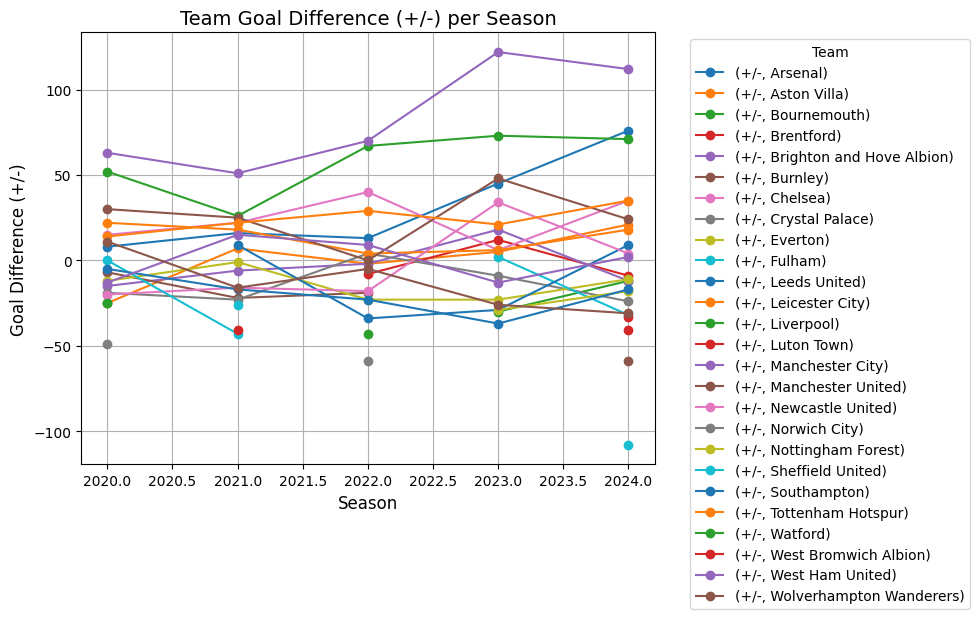

In [159]:

# Plotting the grouped pivot table

# Plot each team's goal difference (+/-) over the seasons
grouped_pivot.plot(figsize=(10, 6), marker='o')

# Adding labels and title
plt.title('Team Goal Difference (+/-) per Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Goal Difference (+/-)', fontsize=12)

# Displaying the plot
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


# 4- Data Encoder
### data encoding refers to converting categorical variables into numerical formats that can be understood by machine learning algorithms.

In [160]:

data_encoder={
    "team_encoded":ddf['team'],
    'day_encoded':ddf['day'],
    'opponent_encoded':ddf['opponent'],
    'result_encoded':ddf['result'],
    'formation_encoded':ddf['formation'],

  
}





In [161]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()


for name, value in data_encoder.items():
    # Apply Label Encoding for each column and assign the transformed values to the original column in the DataFrame
    dff[name] = label_encoder.fit_transform(value)
dff

,time,comp,round,day,venue,result,gf,ga,opponent,xg,...,season,team,XGD,Weekend,+/-,team_encoded,day_encoded,opponent_encoded,result_encoded,formation_encoded
0,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,Wolves,1.9,...,2024,Manchester City,1.30,0,2,14,1,25,2,12
1,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,Leicester City,0.9,...,2024,Manchester City,-2.00,1,-3,14,3,11,1,12
2,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,Leeds United,1.2,...,2024,Manchester City,-1.20,1,0,14,2,10,0,16
3,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,Arsenal,1.3,...,2024,Manchester City,0.40,1,1,14,2,0,2,0
4,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,West Ham,1.0,...,2024,Manchester City,0.70,1,0,14,2,24,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,18:00 (19:00),Premier League,Matchweek 34,Tue,Away,L,1,2,Watford,1.2,...,2020,Norwich City,0.00,0,-1,17,5,22,1,12
4784,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,West Ham,0.6,...,2020,Norwich City,-2.85,1,-4,17,2,24,1,12
4785,20:15 (21:15),Premier League,Matchweek 36,Tue,Away,L,0,1,Chelsea,0.1,...,2020,Norwich City,-2.40,0,-1,17,5,6,1,10
4786,17:30 (18:30),Premier League,Matchweek 37,Sat,Home,L,0,2,Burnley,0.3,...,2020,Norwich City,-1.50,1,-2,17,2,5,1,12


# Classification Model

In [162]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4786 entries, 0 to 4787
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               4786 non-null   object 
 1   comp               4786 non-null   object 
 2   round              4786 non-null   object 
 3   day                4786 non-null   object 
 4   venue              4786 non-null   object 
 5   result             4786 non-null   object 
 6   gf                 4786 non-null   int64  
 7   ga                 4786 non-null   int64  
 8   opponent           4786 non-null   object 
 9   xg                 4786 non-null   float64
 10  xga                4786 non-null   float64
 11  poss               4786 non-null   int64  
 12  attendance         4786 non-null   int32  
 13  captain            4786 non-null   object 
 14  formation          4786 non-null   object 
 15  referee            4786 non-null   object 
 16  match report       4786 non-n

In [163]:
dff=dff[[ 'gf', 'ga', 'xg', 'xga', 'poss', 'attendance',  'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'XGD', 'Weekend', '+/-', 'day_encoded',
       'team_encoded', 'opponent_encoded', 'result_encoded','formation_encoded']]

In [164]:
# Calculate the correlation of all columns in the DataFrame with the 'result_encoded' column

dff.corr()['result_encoded']

gf                   0.510626
ga                  -0.260415
xg                   0.318113
xga                 -0.211080
poss                 0.088210
attendance           0.031285
sh                   0.163811
sot                  0.305274
dist                -0.093216
fk                   0.011603
pk                        NaN
pkatt                     NaN
season               0.018092
XGD                  0.329722
Weekend              0.000149
+/-                  0.509278
day_encoded          0.020680
team_encoded        -0.008972
opponent_encoded     0.034508
result_encoded       1.000000
formation_encoded    0.008719
Name: result_encoded, dtype: float64

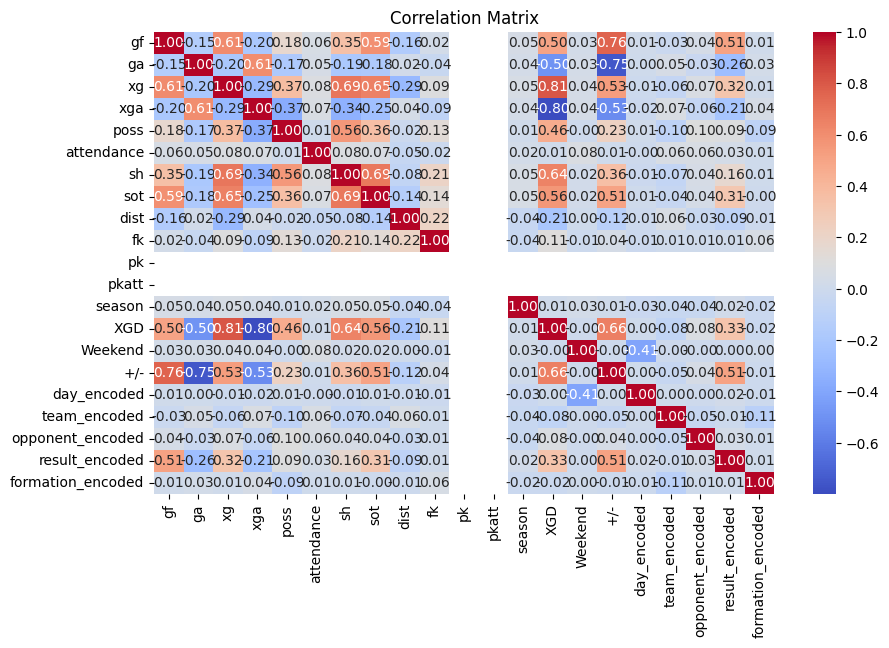

In [165]:
data=dff.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Features Selection
### The code selects the top 80% of features from the dataset x based on their statistical relevance to the target variable y.

In [166]:
X=dff[[ 'gf', 'ga', 'xg', 'xga', 'poss', 'attendance',  'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt',  'XGD',  '+/-',
       'team_encoded', 'opponent_encoded']]
Y=dff['result_encoded']

In [179]:
from sklearn.feature_selection import SelectPercentile, f_classif
import pandas as pd

# Assuming X is the feature matrix and Y is the target vector
function_selection = SelectPercentile(score_func=f_classif, percentile=80)

# Apply feature selection
x_selection = function_selection.fit_transform(X, Y)

# Create a DataFrame with the selected features
pd.DataFrame(x_selection,columns=[i for i,j in zip(X,function_selection.get_support())if j])

# Display the selected features DataFrame


,gf,ga,xg,xga,poss,sh,sot,dist,fk,XGD,+/-,team_encoded
0,3.0,1.0,1.9,0.60,65.0,13.0,8.0,21.1,2.0,1.30,2.0,14.0
1,2.0,5.0,0.9,2.90,72.0,16.0,5.0,19.8,1.0,-2.00,-3.0,14.0
2,1.0,1.0,1.2,2.40,49.0,23.0,1.0,18.2,1.0,-1.20,0.0,14.0
3,1.0,0.0,1.3,0.90,58.0,13.0,5.0,17.7,0.0,0.40,1.0,14.0
4,1.0,1.0,1.0,0.30,69.0,14.0,7.0,20.9,1.0,0.70,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4781,1.0,2.0,1.2,1.20,56.0,12.0,3.0,16.9,1.0,0.00,-1.0,17.0
4782,0.0,4.0,0.6,3.45,53.0,11.0,2.0,19.8,1.0,-2.85,-4.0,17.0
4783,0.0,1.0,0.1,2.50,33.0,2.0,0.0,20.6,0.0,-2.40,-1.0,17.0
4784,0.0,2.0,0.3,1.80,42.0,6.0,2.0,13.4,0.0,-1.50,-2.0,17.0


In [ ]:
#Feature Selection: This technique is commonly used in machine learning to reduce the dimensionality of the feature space by retaining only the most important features, which can help improve the model's performance and reduce overfitting
function_selection.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False,  True,  True,  True, False])

In [169]:
x=dff[[ 'gf', 'ga', 'xg', 'xga', 'poss',  'sh', 'sot', 'dist', 'fk',  'XGD',  '+/-','team_encoded']]
y=dff['result_encoded']

## Train/Test dataset
### We split our dataset into train and test set:


In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (3350, 12) (3350,)
Test set: (1436, 12) (1436,)


#  Decision Tree Classifier Simplified



## What is a Decision Tree?
A Decision Tree is a flowchart-like structure where each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents an outcome.
## Advantages of Decision Trees
- **Interpretability**: Easy to understand and visualize the decision-making process.
- **No Feature Scaling**: Can handle both numerical and categorical data without normalization.
- **Handles Non-linear Relationships**: Can capture complex patterns in the data.
- **Feature Importance**: Provides a clear indication of which features are most important for prediction.


In [171]:
dt = DecisionTreeClassifier()

# Define the hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for the best split
}

## GridSearchCV

### This process finds the optimal hyperparameters for the model to maximize performance.









In [172]:

from sklearn.model_selection import GridSearchCV
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [173]:
dt = DecisionTreeClassifier ( max_depth=None, criterion='gini',min_samples_split= 2, min_samples_leaf= 1,max_features= None)

In [174]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [175]:
yhat=dt.predict(x_test)
yhat

array([2, 1, 1, ..., 1, 0, 2])

In [176]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, dt.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  1.0


### classification Report

- **Precision**: Measures how many of the predicted positive cases are actually positive.
  
  - High precision means fewer false positives.

- **Recall**: Measures how many actual positive cases were correctly identified.
  
  - High recall means fewer false negatives.

- **F1-Score**: The harmonic mean of precision and recall. It balances both metrics and is useful when you need to balance false positives and false negatives.
 
  - F1 is high when both precision and recall are high.


In [177]:
class_r=classification_report(y_test,yhat)
print(class_r)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       330
           1       1.00      1.00      1.00       554
           2       1.00      1.00      1.00       552

    accuracy                           1.00      1436
   macro avg       1.00      1.00      1.00      1436
weighted avg       1.00      1.00      1.00      1436



### confusion matrix
Another way of looking at the accuracy of the classifier is to look at __confusion matrix__.


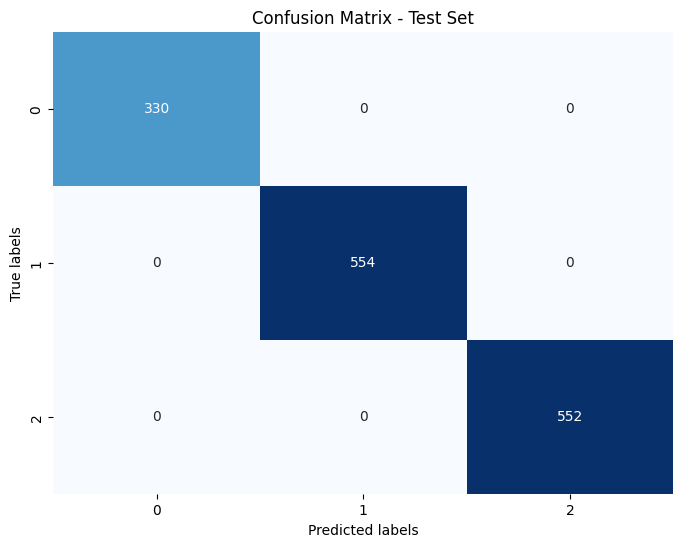

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, yhat)

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()